# python数据可视化: matplotlib绘图

实用python编程 

2017-11-27

首先通过pylab命令加载numpy和matplotlib

In [98]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [99]:
a = 2
b = [2]
(c,) = [2]
print a, b, c

2 [2] 2


## 从简单的例子开始


1. 画一条直线 $y=x$. 

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10. ]


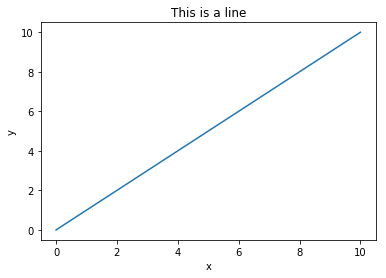

In [100]:
fig = plt.figure()
axes = plt.axes()
#x = range(5)
x = np.linspace(0, 10, 21)
print x
y = [v for v in x]
axes.plot(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('This is a line')

### 课堂练习171127-1

画一条抛物线 $y=x^2$ 及其他函数曲线如指数 $e^x$, 对数 $\log_b(x)$

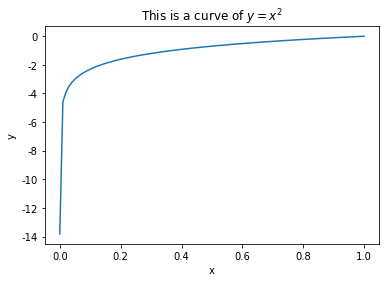

In [101]:
fig = plt.figure()
axes = plt.axes()

x = np.linspace(1e-6, 1, 100) # Return evenly spaced numbers over a specified interval
#y = map(lambda v:v**2, x)
y = map(np.log, x)
axes.plot(x,y)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('This is a curve of $y=x^2$')

## 调整线条的属性
+ 线型
+ 颜色
+ 宽度

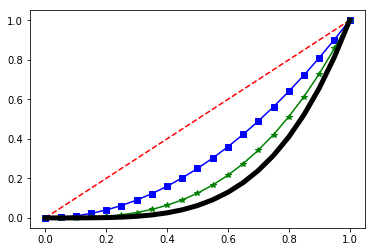

In [102]:
axes = plt.axes()
t = np.linspace(0, 1, 21)
# red dashes, blue line, and green triangles
(line1, ) = axes.plot(t, t, 'r--')
(line2, ) = axes.plot(t, t**2, 'b-s')
(line3, ) = axes.plot(t, t**3, 'g-*')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5)

## 子图
用plot.subplots方法可以在一张图上画出多个子图。

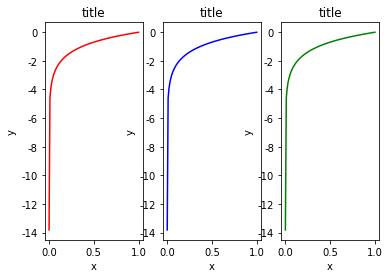

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=3)
colors = 'r b g k y'.split()
for i,ax in enumerate(axes):
    ax.plot(x, y, colors[i])
#for ax in axes:
    #ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

注意到右图的y标签落到了左图上。fig.tight_layout方法可以自动调整两图的位置使二者不重叠。

2 3


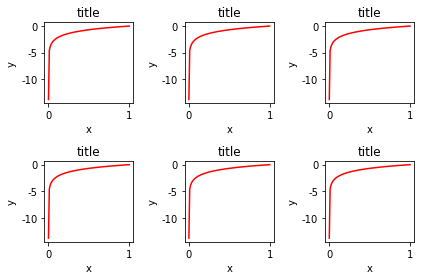

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=3)
max_row, max_col = axes.shape
print max_row, max_col

for i in range(max_row):
    for j in range(max_col):
        ax = axes[i][j]
        ax.plot(x, y, 'r')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('title')
    
fig.tight_layout()

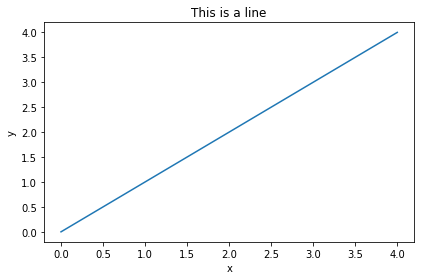

In [105]:
x = range(5)
y = [v for v in x]
plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is a line')
plt.tight_layout()
plt.savefig('line.jpg')

### 特定方向的直线
+ 水平方向 $y=常量$
+ 竖直方向 $x=常量$

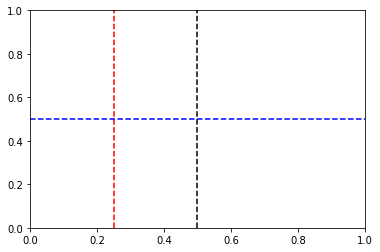

In [106]:
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axvline(x=0.25, color='r', linestyle='--')
plt.axhline(y=0.5, color='b', linestyle='--')

## 图例 lengend
为了让读者更好地理解上图中每条直线/曲线的含义，我们通过legend（图例）区分。

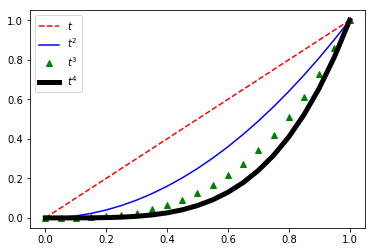

In [107]:
fig, axes = plt.subplots()
t = np.linspace(0, 1, 21)
# red dashes, blue line, and green triangles
(line1, ) = axes.plot(t, t, 'r--', label='$t$')
(line2, ) = axes.plot(t, t**2, 'b-', label='$t^2$')
(line3, ) = axes.plot(t, t**3, 'g^', label='$t^3$')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5, label='$t^4$')
axes.legend()

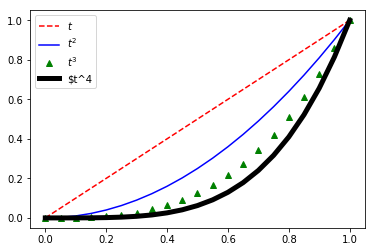

In [108]:
fig, axes = plt.subplots()
(line1, ) = axes.plot(t, t, 'r--')
(line2, ) = axes.plot(t, t**2, 'b-')
(line3, ) = axes.plot(t, t**3, 'g^')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5)
axes.legend([line1, line2, line3, line4], ['$t$', '$t^2$', '$t^3$', '$t^4'])

legend的各种属性
+ 位置 location
+ 字体大小 font
+ ...

参考资料: https://matplotlib.org/users/legend_guide.html

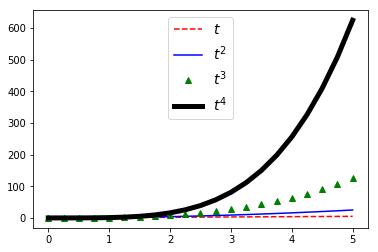

In [109]:
fig, axes = plt.subplots()
t = np.linspace(0, 5, 21)
# red dashes, blue line, and green triangles
(line1, ) = axes.plot(t, t, 'r--', label='$t$')
(line2, ) = axes.plot(t, t**2, 'b-', label='$t^2$')
(line3, ) = axes.plot(t, t**3, 'g^', label='$t^3$')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5, label='$t^4$')
axes.legend(loc=9, prop={'size': 14})

## 散点图 Scatter plot

-1.74928 1.56493 -2.8015 2.20744


[-3, 3, -3, 3]

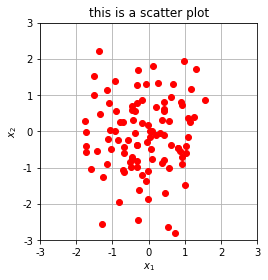

In [110]:
from openpyxl import load_workbook
wb = load_workbook('data/data20171023.xlsx')
ws = wb.active
x1 = [x.value for x in ws['B'][1:]]
x2 = [x.value for x in ws['C'][1:]]
print min(x1), max(x1), min(x2), max(x2)

fig, axes = plt.subplots()
axes.plot(x1, x2, 'ro')
#axes.plot(x1, x2, 'ro', markerfacecolor="None")
axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')
axes.set_title('this is a scatter plot')
axes.set_aspect('equal')
plt.grid(True)
plt.axis([-3, 3, -3, 3])

## 原点作为图的中心点

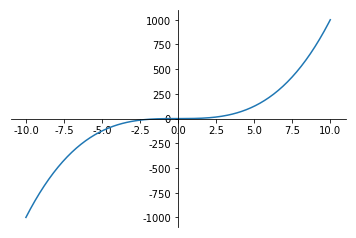

In [111]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

t = np.linspace(-10, 10., 200)
#y = map(lambda x:1/(1+np.exp(-x)), t)
y = map(lambda x:x**3, t)
ax.plot(t, y);

## 双坐标

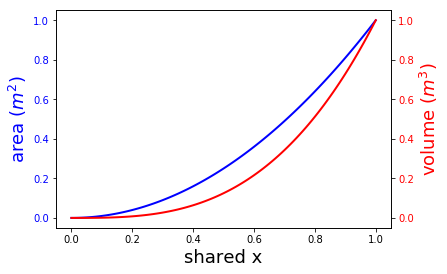

In [113]:
fig, ax1 = plt.subplots()
x = np.linspace(0, 1, 101)
ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel('shared x', fontsize=18)

## 显示中文

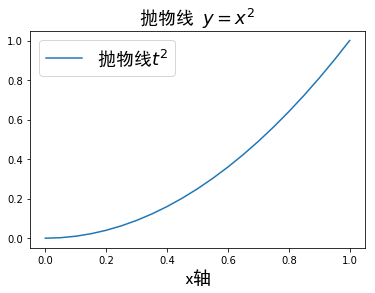

In [114]:
from matplotlib.font_manager import FontProperties

fontsize=18
chf = FontProperties(fname='simhei.ttf', size=fontsize)
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

fig, axes = plt.subplots()
x = np.linspace(0, 1, 21)
y = x**2
(line, ) = axes.plot(x,y)
axes.set_xlabel(u'x轴', fontproperties=chf)
axes.set_title(u'抛物线 $y=x^2$', fontproperties=chf)
axes.legend([line], [u'抛物线$t^2$'], prop=chf)